# Classification

## Exam question 23-24 (2nd session)

Consider a classification task where the target takes three labels $ c_1=$"setosa", $ c_2=$"virginica", $ c_3=$"versicolor" and the input $x \in {\mathbb R}^4 $ where

* the dataframe <span style="font-family:Courier; "> Q3_X</span> 
containing the input matrix of size $ [150,4]$,
* the dataframe <span style="font-family:Courier; "> Q3_Y</span>  containing the output vector,

are in the pickle file
<span style="font-family:Courier; "> classif1.pkl </span>

Given the multiclass nature of the task, the student should implement three one-against-all classification binary tasks.

The student should implement the following classifiers 

* a QDA classifier using the Bayes' rule to estimate the conditional probability: the classifier should use the equation (7.2.67) of the handbook (3/2/2025 version) by considering that $ g_k(x)= \ln p(x | {\mathbf y}= c_k) + \ln P({\mathbf y}=c_k) $,
* a LDA classifier using the Bayes' rule to estimate the conditional probability:  the classifier should use the equation (7.2.70) of the handbook (3/2/2025 version) by considering that $ g_k(x)= \ln p(x | {\mathbf y}= c_k) + \ln P({\mathbf y}=c_k) $ where $ \sigma^2 $ has to be estimated by the average of the variances of the 4 inputs,
* a KNN classifier (K=5 and Euclidean distance) estimating the conditional probability $ P({\mathbf y}=1 |x ) $   with the proportion of neighbours labeled with 1,
* a KNN classifier (K=10 and Euclidean distance) estimating the conditional probability $ P({\mathbf y}=1 |x )$   with the proportion of neighbours labeled with 1,


Once implemented the four classifiers, for each of the three binary tasks the student should perform a leave-one-out classification and 

1. trace the ROC test set curves of the four classifiers,
2. choose the best classifier on the basis of the ROC curve,


Note that you can only use basic Python numpy functions to implement the classifiers (the use of Python packages is not allowed and would imply a zero mark in this exercise).



Use the following instructions to load in Python the relevant variables
```python
import pickle
with open("classif1.pkl", 'rb') as f:
    data = pickle.load(f)
Q3_X=data["Q3_X"]
Q3_Y=data["Q3_Y"]
```
to load the data frame in Python.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pyreadr
import math
import sys

with open("classif1.pkl", 'rb') as f:
    data = pickle.load(f)
Q3_X=data["Q3_X"]
Q3_Y=data["Q3_Y"]

N = Q3_X.shape[0]
X = Q3_X

# Define labels
labels = ["setosa", "virginica", "versicolor"]

In [2]:
def knn(X, Y, q, k):
    d = np.linalg.norm(X - q, axis=1)  # Euclidean distance
    index = np.argsort(d)[:k]
    return np.sum(Y[index] == 1) / k


def qda(Xtr, Ytr, q):
    n = Xtr.shape[1]
    Ntr = Xtr.shape[0]
    I0 = np.where(Ytr == 0)[0]
    I1 = np.where(Ytr == 1)[0]
    P0 = len(I0) / Ntr
    P1 = 1 - P0
    mu0 = np.mean(Xtr[I0, :], axis=0)
    Sigma0 = np.cov(Xtr[I0, :].T)
    mu1 = np.mean(Xtr[I1, :], axis=0)
    Sigma1 = np.cov(Xtr[I1, :].T)
    
    try:
        inv_Sigma0 = np.linalg.inv(Sigma0)
        inv_Sigma1 = np.linalg.inv(Sigma1)
    except np.linalg.LinAlgError:
        # Handle singular matrix
        return 0.5  # or another default value
    
    g0 = -0.5 * np.dot((q - mu0), np.dot(inv_Sigma0, (q - mu0))) \
         - (n / 2) * np.log(2 * np.pi) \
         - 0.5 * np.log(np.linalg.det(Sigma0)) \
         + np.log(P0)
    
    g1 = -0.5 * np.dot((q - mu1), np.dot(inv_Sigma1, (q - mu1))) \
         - (n / 2) * np.log(2 * np.pi) \
         - 0.5 * np.log(np.linalg.det(Sigma1)) \
         + np.log(P1)
    
    return np.exp(g1) / (np.exp(g0) + np.exp(g1))

def lda(Xtr, Ytr, q):
    n = Xtr.shape[1]
    Ntr = Xtr.shape[0]
    I0 = np.where(Ytr == 0)[0]
    I1 = np.where(Ytr == 1)[0]
    P0 = len(I0) / Ntr
    P1 = 1 - P0
    sigma2 = np.mean(np.var(Xtr, axis=0, ddof=1))
    mu0 = np.mean(Xtr[I0, :], axis=0)
    Sigma0 = np.cov(Xtr[I0, :].T)
    mu1 = np.mean(Xtr[I1, :], axis=0)
    Sigma1 = np.cov(Xtr[I1, :].T)
    
    g0 = (-1 / (2 * sigma2)) * (np.dot(q, q) - 2 * np.dot(mu0, q) + np.dot(mu0, mu0)) \
         + np.log(P0)
    
    g1 = (-1 / (2 * sigma2)) * (np.dot(q, q) - 2 * np.dot(mu1, q) + np.dot(mu1, mu1)) \
         + np.log(P1)
    
    return np.exp(g1) / (np.exp(g0) + np.exp(g1))

## One-against-all classification

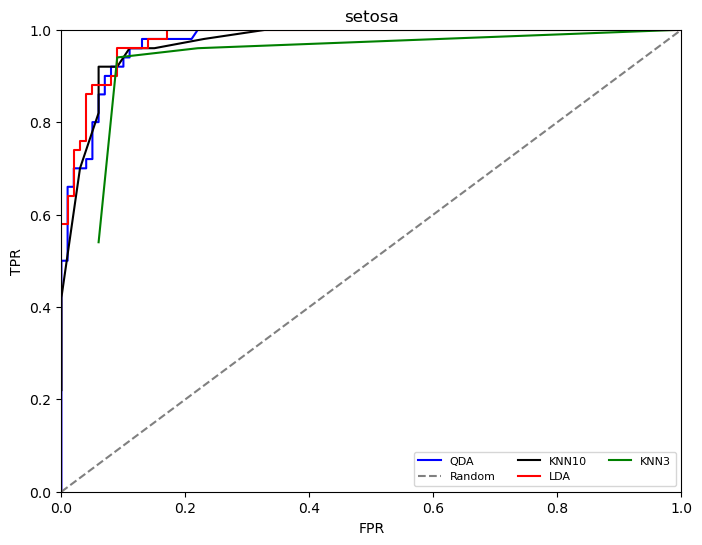

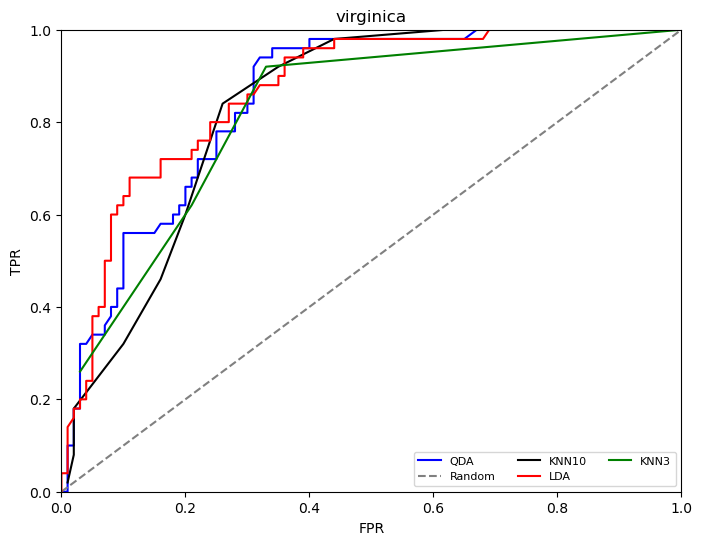

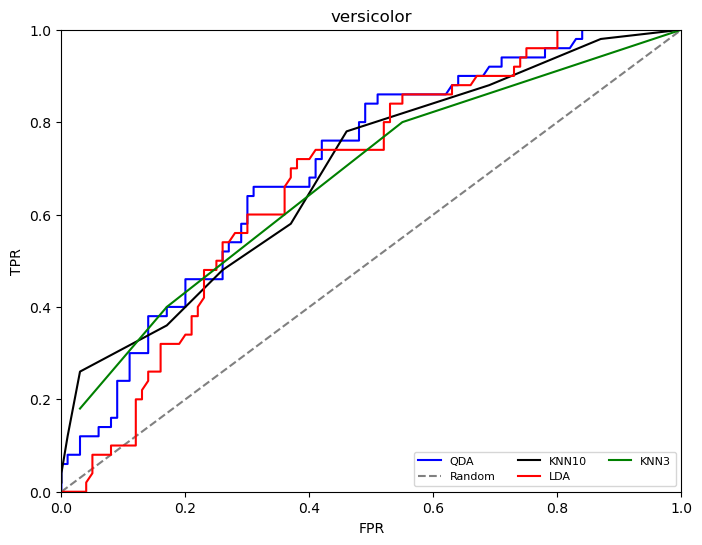

In [3]:


for label in labels:
    Y = np.zeros(N)
    Y[np.where(Q3_Y == label)[0]] = 1
    I1 = np.where(Y == 1)[0]
    I0 = np.where(Y == 0)[0]
    N1 = len(I1)
    N0 = len(I0)
    
 
    
    Yhat1 = np.zeros(N)
    Yhat2 = np.zeros(N)
    Yhat3 = np.zeros(N)
    Yhat4 = np.zeros(N)
    
    for i in range(N):
        X_train = np.delete(X, i, axis=0)
        Y_train = np.delete(Y, i)
        q = X[i, :]
        Yhat1[i] = qda(X_train, Y_train, q)
        Yhat2[i] = knn(X_train, Y_train, q, k=10)
        Yhat3[i] = lda(X_train, Y_train, q)
        Yhat4[i] = knn(X_train, Y_train, q, k=3)
    
    # Sort Yhat1 to Yhat4 in decreasing order
    s1 = np.argsort(-Yhat1)
    s2 = np.argsort(-Yhat2)
    s3 = np.argsort(-Yhat3)
    s4 = np.argsort(-Yhat4)
    
    TPR1 = []
    FPR1 = []
    TPR2 = []
    FPR2 = []
    TPR3 = []
    FPR3 = []
    TPR4 = []
    FPR4 = []
    
    Yts = Y
    THR = np.linspace(0, 1, 1000)  # set of thresholds
    
    for th in THR:
        I1_threshold = np.where(Yhat1 >= th)[0]
        TPR1.append(np.sum(Yts[I1_threshold] == 1) / N1 if N1 else 0)
        FPR1.append(np.sum(Yts[I1_threshold] == 0) / N0 if N0 else 0)
        
        I2_threshold = np.where(Yhat2 >= th)[0]
        TPR2.append(np.sum(Yts[I2_threshold] == 1) / N1 if N1 else 0)
        FPR2.append(np.sum(Yts[I2_threshold] == 0) / N0 if N0 else 0)
        
        I3_threshold = np.where(Yhat3 >= th)[0]
        TPR3.append(np.sum(Yts[I3_threshold] == 1) / N1 if N1 else 0)
        FPR3.append(np.sum(Yts[I3_threshold] == 0) / N0 if N0 else 0)
        
        I4_threshold = np.where(Yhat4 >= th)[0]
        TPR4.append(np.sum(Yts[I4_threshold] == 1) / N1 if N1 else 0)
        FPR4.append(np.sum(Yts[I4_threshold] == 0) / N0 if N0 else 0)
    
    plt.figure(figsize=(8, 6))
    plt.plot(FPR1, TPR1, color='blue', label='QDA')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
    plt.plot(FPR2, TPR2, color='black', label='KNN10')
    plt.plot(FPR3, TPR3, color='red', label='LDA')
    plt.plot(FPR4, TPR4, color='green', label='KNN3')
    
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(label)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.legend(loc='lower right', fontsize=8, ncol=3)
    plt.show()


## Exam question 23-24 (1st session)



Consider a binary classification task where the target is ${\mathbf y} \in \{-1,1\}$ and the input 
$x \in {\mathbb R}^4 $ where in the pickle file <span style="font-family:Courier; "> classif2.pkl </span>

* the  dataframe <span style="font-family:Courier; "> Q4_D </span> contains the training dataset of size $ N= 500 $,
* the dataframe <span style="font-family:Courier; "> Q4_Dts </span>  contains the test dataset of size $ N=500$,
* the label of the target is in the 5th column of the datasets.
 

The student should train the following classifiers on the training set 

* a classifier using the Bayes' rule to estimate the conditional probability \( P({\mathbf y}=1 |q )\) and assuming that the inverse conditional distributions are Normal: use the package scipy.stats for Gaussian densities,
* a KNN classifier (K=5 and Euclidean distance) estimating the conditional probability \( P({\mathbf y}=1 |q )\) with the proportion of neighbours labeled with 1,
* a minimum distance classifier returning as estimation of the conditional probability \( P({\mathbf y}=1 |q )\)  in a point \( q\)  the quantity
 \( 1- \exp^{ -\| q-\mu_+\| ^2 } \)
where \( \mu_+ \) is the sample mean of the training set observations labelled with 1 and  \(  \| q-\mu_+\|  \) is the Euclidean distance between \( q \) and \( \mu_+ \) ,
* a minimum distance classifier returning as estimation of the conditional probability  \( P({\mathbf y}=1 |q )\)  in a point \( q\)  the quantity
 \( \exp^{- \| q-\mu_-\| ^2 } \)
where \( \mu_- \) is the sample mean of the training set observations labelled with -1 and  \(  \| q-\mu_-\|  \) is the Euclidean distance between \( q \) and \( \mu_- \) ,



Once trained the four classifiers, the student should 

* compute the precision of the four classifiers for the 50 test points with the highest estimated conditional probability,
* trace the ROC test set curves of the four classifiers,
* choose the best classifier on the basis of the ROC curve,

 Note that you can only use the function multivariate_normal from scipy.stats, the package pyreadr and basic Python functions to implement the classifiers (the use of Python packages other than scipy.stats, matplotlib and pyreadr is not allowed and would imply a zero mark in this exercise).

 Use the instructions

```python
import pickle
with open("classif2.pkl", 'rb') as f:
    data = pickle.load(f)
Q4_D=data["Q4_D"]
Q4_Dts=data["Q4_Dts"]
```
to load the variables in the Python environment. 

In [4]:
import pickle
with open("classif2.pkl", 'rb') as f:
    data = pickle.load(f)
Q4_D=data["Q4_D"]
Q4_Dts=data["Q4_Dts"]

## Classifiers implementation

In [5]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

def knn(X, Y, q, k):

    """
    K-Nearest Neighbors classifier.
    Parameters:
    X (ndarray): Training data features.
    Y (ndarray): Training data labels.
    q (ndarray): Query point.
    k (int): Number of neighbors.
    Returns:
    float: Proportion of neighbors with label 1.
    """

    N = X.shape[0]
    # Euclidean metric
    distances = np.sqrt(np.sum((X - q) ** 2, axis=1))
    index = np.argsort(distances)[:k]
    return np.sum(Y[index] == 1) / k



def gb(X, Y, q):

    """
    Gaussian Bayesian classifier.
    Parameters:
    X (ndarray): Training data features.
    Y (ndarray): Training data labels.
    q (ndarray): Query point.
    Returns:
    float: Posterior probability of label 1.

    """
    N = len(Y)
    I1 = np.where(Y == 1)[0]
    I0 = np.where(Y == -1)[0]
    p1 = len(I1) / N
    p0 = 1 - p1

    mu1 = np.mean(X[I1], axis=0)
    mu0 = np.mean(X[I0], axis=0)
    cov1 = np.cov(X[I1].T)
    cov0 = np.cov(X[I0].T)

    p1x = multivariate_normal.pdf(q, mean=mu1, cov=cov1)
    p0x = multivariate_normal.pdf(q, mean=mu0, cov=cov0)

    Yhat = p1x * p1 / (p1x * p1 + p0x * p0)
    return Yhat



def md(X, Y, q):

    """
    Mahalanobis Distance-based classifier.

    Parameters:
    X (ndarray): Training data features.
    Y (ndarray): Training data labels.
    q (ndarray): Query point.
    Returns:
    float: 1 minus the exponential of the squared distance to mu1.
    """

    N = len(Y)
    I1 = np.where(Y == 1)[0]
    mu1 = np.mean(X[I1], axis=0)

    d1 = np.sum((q - mu1) ** 2)
    return 1 - np.exp(-d1)



def md0(X, Y, q):
    """
    Complementary Mahalanobis Distance-based classifier.
    Parameters:
    X (ndarray): Training data features.
    Y (ndarray): Training data labels.
    q (ndarray): Query point.
    Returns:
    float: Exponential of the squared distance to mu0.

    """
    N = len(Y)
    I0 = np.where(Y == -1)[0]
    mu0 = np.mean(X[I0], axis=0)
    d0 = np.sum((q - mu0) ** 2)

    return np.exp(-d0)


In [6]:
import numpy as np



# Prepare training and testing data

N = Q4_D.shape[0]
n = Q4_D.shape[1] - 1

Xtr = Q4_D[:, :n]
Ytr = Q4_D[:, n]
Xts = Q4_Dts[:, :n]
Yts = Q4_Dts[:, n]

I1_test = np.where(Yts == 1)[0]
I0_test = np.where(Yts == -1)[0]

N1 = len(I1_test)
N0 = len(I0_test)
Nts = Xts.shape[0]

Yhat1 = np.zeros(Nts)
Yhat2 = np.zeros(Nts)
Yhat3 = np.zeros(Nts)
Yhat4 = np.zeros(Nts)

for i in range(Nts):
    q = Xts[i]
    Yhat1[i] = gb(Xtr, Ytr, q)
    Yhat2[i] = knn(Xtr, Ytr, q, k=5)
    Yhat3[i] = md(Xtr, Ytr, q)
    Yhat4[i] = md0(Xtr, Ytr, q)

# Sort the predictions in decreasing order

s1_ix = np.argsort(-Yhat1)
s2_ix = np.argsort(-Yhat2)
s3_ix = np.argsort(-Yhat3)
s4_ix = np.argsort(-Yhat4)

Nalerts = 50

PR1 = np.sum(Yts[s1_ix[:Nalerts]] == 1) / Nalerts
PR2 = np.sum(Yts[s2_ix[:Nalerts]] == 1) / Nalerts
PR3 = np.sum(Yts[s3_ix[:Nalerts]] == 1) / Nalerts
PR4 = np.sum(Yts[s4_ix[:Nalerts]] == 1) / Nalerts

print(f"Precision GB={PR1} KNN={PR2} MD={PR3} MD0={PR4}")

TPR1 = []
FPR1 = []
TPR2 = []
FPR2 = []
TPR3 = []
FPR3 = []
TPR4 = []
FPR4 = []


FN2 = []  # This variable is defined but not used in the R code
THR = np.linspace(0, 1, 1000)  # set of thresholds



for th in THR:
    # GB
    I1 = np.where(Yhat1 >= th)[0]
    TPR1.append(np.sum(Yts[I1] == 1) / N1)
    FPR1.append(np.sum(Yts[I1] == -1) / N0)

    # KNN
    I2 = np.where(Yhat2 >= th)[0]
    TPR2.append(np.sum(Yts[I2] == 1) / N1)
    FPR2.append(np.sum(Yts[I2] == -1) / N0)

    # MD
    I3 = np.where(Yhat3 >= th)[0]
    TPR3.append(np.sum(Yts[I3] == 1) / N1)
    FPR3.append(np.sum(Yts[I3] == -1) / N0)

    # MD0
    I4 = np.where(Yhat4 >= th)[0]
    TPR4.append(np.sum(Yts[I4] == 1) / N1)
    FPR4.append(np.sum(Yts[I4] == -1) / N0)




Precision GB=0.82 KNN=0.68 MD=0.42 MD0=0.36


## Plot ROC curves

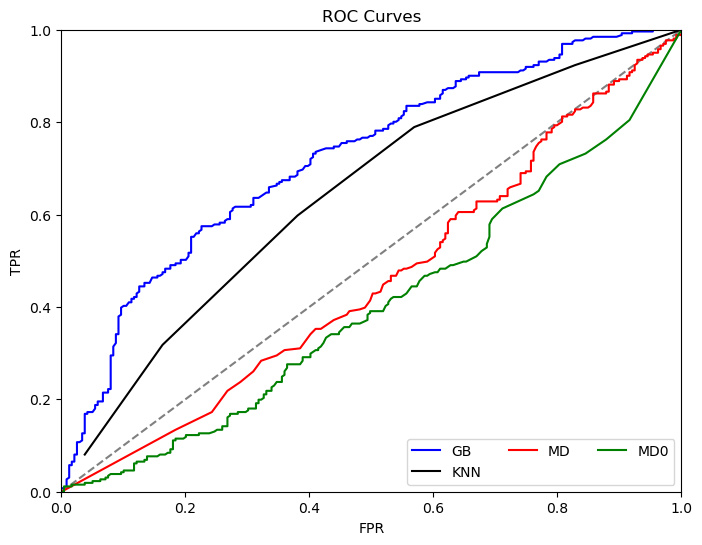

In [7]:


plt.figure(figsize=(8, 6))
plt.plot(FPR1, TPR1, color='blue', label='GB')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.plot(FPR2, TPR2, color='black', label='KNN')
plt.plot(FPR3, TPR3, color='red', label='MD')
plt.plot(FPR4, TPR4, color='green', label='MD0')



plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc='lower right', fontsize=10, ncol=3)
plt.title("ROC Curves")
plt.show()
